<a href="https://colab.research.google.com/github/theAnonymousCoder31/DataScienceAttrocities-/blob/January-Commits/Sentiment_Analysis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Sentiment Analysis?

> Sentiment analysis/opinion mining is the process of understanding the opinion of an author about a subject

We usually have 3 elements that goes into a sentiment analysis system

* First element : Opinion/emotion - pos, neg, neutral, joy, anger

* Subject of discussion : **what is being talked about?**

* Opinion Holder : **who's expressing the opinion**


**Why Sentiment Analysis**

1.   Social media monitoring
2.   Brand Monitoring

# Working on IMDB Moview Reviews Dataset

In [ ]:
import pandas as pd

In [ ]:
imdb = pd.read_csv('/content/IMDB_sample.csv')

In [ ]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', imdb.label.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', imdb.label.value_counts() / len(imdb))

Number of positive and negative reviews:  label
0    3782
1    3719
Name: count, dtype: int64
Proportion of positive and negative reviews:  label
0    0.504199
1    0.495801
Name: count, dtype: float64


In [ ]:
length_reviews = imdb.review.str.len()


# How long is the shortest review
print(min(length_reviews))

# How long is the longest review
print(max(length_reviews))

52
10321


# Sentiment Analysis types & approaches

## Levels of granularity
1.   Document level - whole review of product, for example
2.   Sentence level - determining opinion expresses in each sentence
3.   Aspect level - expresses differnt opinions on different features

> Type of sentiment analysis algorithms

* Rule/lexicon-based
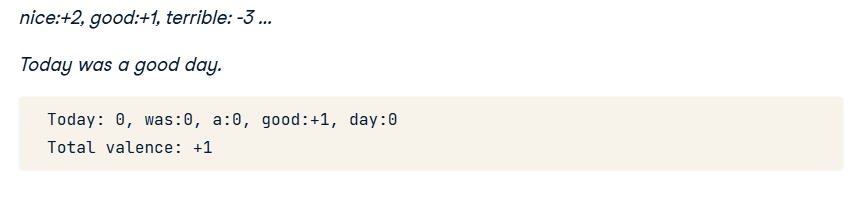

* Automatic/Machine Learning

 building our model based on training and testing data - What we do



**What is the valence of a sentence ?**

The valence is the score given for a text based on it's sentiment. We can use python's TextBlob library to calculate the score

In [ ]:
text = "Today was a good day."
!pip install textblob

from textblob import TextBlob

my_valence = TextBlob(text)
print(my_valence.sentiment)
# Positive Polarity Score

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)


## What are Word Clouds ?

The more frequent a word is, the BIGGER and **bolder** it will appear in the word cloud.

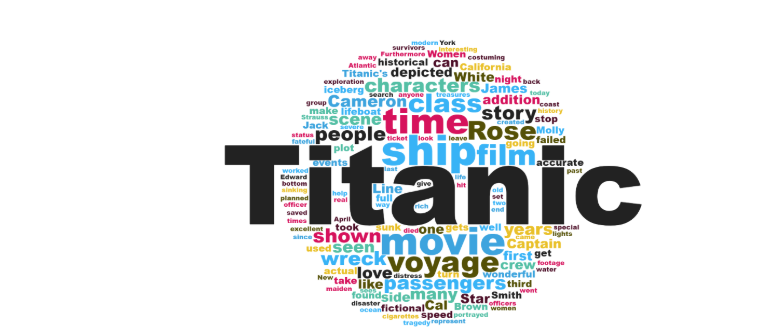




In [ ]:
# Build a word cloud in Python

!pip install wordcloud

import matplotlib.pyplot as plt

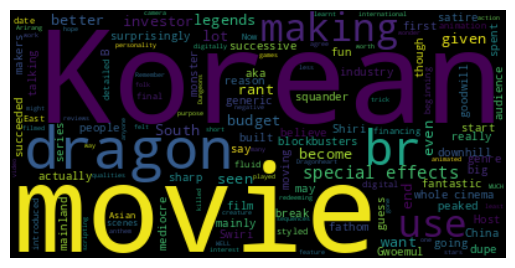

In [ ]:
from wordcloud import WordCloud

review_text = max(imdb['review'])

wordcloud = WordCloud().generate(review_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

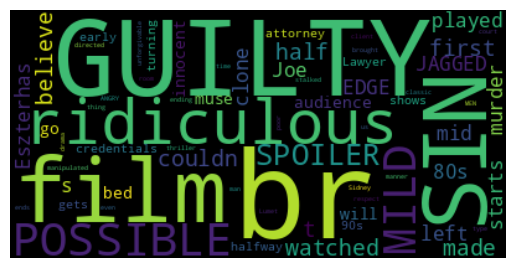

In [ ]:
review_text = min(imdb['review'])

wordcloud = WordCloud().generate(review_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

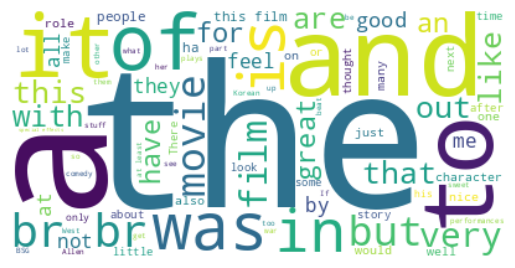

In [ ]:
# On the IMDB movie review dataset, let's concatenate 10 positive reviews together

pos = imdb[imdb['label']==1]
pos_review = ' '.join(pos['review'][:10])

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white', stopwords='english').generate(pos_review)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis("off")

# Don't forget to show the final image
plt.show()

## Using Bag-of-Words Model for Sentiment Analysis

A bag-of-words is an approach to transform text to numeric form.

In [ ]:
# Using Count Vectorizer to transform text into bag of words

from sklearn.feature_extraction.text import CountVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Build the vectorizer and fit it

annac_vect = CountVectorizer()
annac_vect.fit(annak)

# Transform the text to bag of words

bag_of_words = annac_vect.transform(annak)

# Print the bag-of-words result
print(bag_of_words.toarray())

[[1 1 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1 1 2 1]]


In [ ]:
# BOW using Imdb Reviews

# Build the vectorizer, specify max features
vect = CountVectorizer(max_features=100)
# Fit the vectorizer
vect.fit(imdb.review)

# Transform the review column
X_review = vect.transform(imdb.review)

# Create the bow representation
X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
X_df.head()

,about,after,all,also,an,and,any,are,as,at,...,well,were,what,when,which,who,will,with,would,you
0,0,0,0,0,0,1,0,0,2,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,3,1,1,11,0,3,3,4,...,0,0,1,1,2,0,2,7,2,3
2,0,1,0,0,1,7,0,1,2,1,...,0,0,0,0,0,0,0,2,0,0
3,0,0,0,0,2,1,0,1,2,2,...,1,0,0,0,0,1,0,0,0,1
4,0,0,3,0,0,8,0,3,1,0,...,2,1,0,1,1,0,0,2,0,0


### Capturing context with a BOW

*Unigrams* : Single tokens

*Bigrams* : Two tokens

*Trigrams* : Three tokens

We can set the context of the tokens using the count vectorizer and n_gram range

**Specifying vocabulary size**

We can set few parameters in the CountVectorizer that can set the size of the vocabulary

> The max_features can tell the CountVectorizer to take the top most frequent tokens in the corpus. If set to None, all words will be included

> max_df : ignore terms with higher than specified frequency

> min_df : ignore terms with lower than specified frequency

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Specify token sequence length with BOW
vect = CountVectorizer(max_features=100, ngram_range=(2,2))
vect.fit(imdb.review)
X_review = vect.transform(imdb.review)

# Create the bow representation
X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
X_df.head()

,about the,all the,and his,and it,and the,as the,as well,at least,at the,br br,...,to watch,trying to,want to,was the,which is,with the,would be,would have,you can,you re
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,2,0,0,1,0,0,1,2,6,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Specifying the vocabulary size
vect = CountVectorizer(max_features=100, ngram_range=(3,3),max_df=200,min_df=50)
vect.fit(imdb.review)
X_review = vect.transform(imdb.review)

# Create the bow representation
X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
X_df.head()

,about this film,about this movie,all in all,all of the,and it is,any of the,as far as,as it is,at the same,at the time,...,to see it,to see the,to see this,to watch it,to watch this,ve ever seen,want to see,was one of,watch this movie,you have to
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Build New Features from text

we can build new features from the existing data. For example, let's create a new feature - length of the tokens of each review

In [ ]:
import nltk
from nltk import word_tokenize

nltk.download('punkt_tab')

# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in imdb.review]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
#create tokens length variable
len_tokens=[]

for i in range(len(word_tokens)):
    len_tokens.append(len(word_tokens[i]))

imdb['tokens_len']=len_tokens
imdb.head()

,Unnamed: 0,review,label,tokens_len
0,18245,This short spoof can be found on Elite's Mille...,0,155
1,19801,A singularly unfunny musical comedy that artif...,0,645
2,3222,"An excellent series, masterfully acted and dir...",1,121
3,6010,The master of movie spectacle Cecil B. De Mill...,1,128
4,16355,I was gifted with this movie as it had such a ...,0,248


In [ ]:
# Detecting the Language in Python
!pip install langdetect
# Import the language detection function and package
from langdetect import detect_langs

# Detect the language of the foreign string
foreign = "ఇది ఒక చిన్న పరీక్ష వాక్యం. ఇది తెలుగు భాషలో ఉంది. ఇది కొంచెం పొడవుగా ఉంది, కానీ ఇంకా చిన్నది"

print(detect_langs(foreign))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=a6f6d7a9418c205f5873eb7a74f54c3a16145f846a658e11376eaaca01d843ce
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
[te:0.9999999999880731]


In [ ]:
# Creating a new feature - most likely language of the review

language = []
def get_language(text):
  try:
    language = detect_langs(text)
    return str(language).split(':')[0][1:]
  except:
    pass

for row in range(len(imdb)):
  language.append(get_language(imdb.iloc[row,1]))

imdb['language']=language
imdb.head()

,Unnamed: 0,review,label,tokens_len,language
0,18245,This short spoof can be found on Elite's Mille...,0,155,en
1,19801,A singularly unfunny musical comedy that artif...,0,645,en
2,3222,"An excellent series, masterfully acted and dir...",1,121,en
3,6010,The master of movie spectacle Cecil B. De Mill...,1,128,en
4,16355,I was gifted with this movie as it had such a ...,0,248,en


In [ ]:
imdb['language'].value_counts()

,count
language,
en,7501


## Getting Numeric Features from Text

### Removing Stopwords from Word Clouds

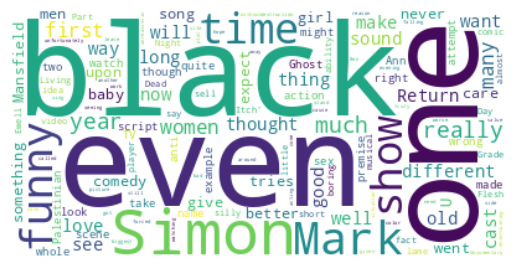

In [ ]:
# Removing Stop words : words that occur most frequently and are not informative

# On the IMDB movie review dataset, let's concatenate 10 negative reviews together
from wordcloud import WordCloud, STOPWORDS
neg = imdb[imdb['label']==0]
neg_review = ' '.join(neg['review'][:10])

my_stopwords = STOPWORDS.update(['br','movie','film','cinema','movies'])

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(neg_review)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis("off")

# Don't forget to show the final image
plt.show()


### Removing Stopword while creating a BoW vector

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# Define the stop words
my_stop_words = list(ENGLISH_STOP_WORDS.union(['movie', 'film', 'br']))

# Build the vectorizer, specify max features
vect = CountVectorizer(max_features=100, stop_words=my_stop_words)

# Fit the vectorizer
vect.fit(imdb.review)

# Create the bow representation
X_review = vect.transform(imdb.review)
# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
X_df.head()

,10,acting,action,actors,actually,away,bad,best,better,big,...,ve,want,watch,watching,way,work,world,worst,years,young
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Cleaning Tokens using string manipulations & regex

In [ ]:
tokens = [word_tokenize(review) for review in imdb.review]

print("Default tokens size: ", tokens[0])

Default tokens size:  ['This', 'short', 'spoof', 'can', 'be', 'found', 'on', 'Elite', "'s", 'Millennium', 'Edition', 'DVD', 'of', '``', 'Night', 'of', 'the', 'Living', 'Dead', "''", '.', 'Good', 'thing', 'to', 'as', 'I', 'would', 'have', 'never', 'went', 'even', 'a', 'tad', 'out', 'of', 'my', 'way', 'to', 'see', 'it.Replacing', 'zombies', 'with', 'bread', 'sounds', 'just', 'like', 'silly', 'harmless', 'fun', 'on', 'paper', '.', 'In', 'execution', ',', 'it', "'s", 'a', 'different', 'matter', '.', 'This', 'short', 'did', "n't", 'even', 'elicit', 'a', 'chuckle', 'from', 'me', '.', 'I', 'really', 'never', 'thought', 'I', "'d", 'say', 'this', ',', 'but', '``', 'Night', 'of', 'the', 'Day', 'of', 'the', 'Dawn', 'of', 'the', 'Son', 'of', 'the', 'Bride', 'of', 'the', 'Return', 'of', 'the', 'Revenge', 'of', 'the', 'Terror', 'of', 'the', 'Attack', 'of', 'the', 'Evil', ',', 'Mutant', ',', 'Alien', ',', 'Flesh', 'Eating', ',', 'Hellbound', ',', 'Zombified', 'Living', 'Dead', 'Part', '2', ':', 'In',

In [ ]:
# Remove characters and digits , i.e. retain only letters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in tokens]

print("Cleaned tokens size: ", cleaned_tokens[0])

Cleaned tokens size:  ['This', 'short', 'spoof', 'can', 'be', 'found', 'on', 'Elite', 'Millennium', 'Edition', 'DVD', 'of', 'Night', 'of', 'the', 'Living', 'Dead', 'Good', 'thing', 'to', 'as', 'I', 'would', 'have', 'never', 'went', 'even', 'a', 'tad', 'out', 'of', 'my', 'way', 'to', 'see', 'zombies', 'with', 'bread', 'sounds', 'just', 'like', 'silly', 'harmless', 'fun', 'on', 'paper', 'In', 'execution', 'it', 'a', 'different', 'matter', 'This', 'short', 'did', 'even', 'elicit', 'a', 'chuckle', 'from', 'me', 'I', 'really', 'never', 'thought', 'I', 'say', 'this', 'but', 'Night', 'of', 'the', 'Day', 'of', 'the', 'Dawn', 'of', 'the', 'Son', 'of', 'the', 'Bride', 'of', 'the', 'Return', 'of', 'the', 'Revenge', 'of', 'the', 'Terror', 'of', 'the', 'Attack', 'of', 'the', 'Evil', 'Mutant', 'Alien', 'Flesh', 'Eating', 'Hellbound', 'Zombified', 'Living', 'Dead', 'Part', 'In', 'Shocking', 'was', 'a', 'VERY', 'better', 'parody', 'and', 'not', 'nearly', 'as', 'lame', 'or', 'br', 'br', 'My', 'Grade', 

In [ ]:
print("Default Tokens Length : ", len(tokens[0]))
print("Cleaned Tokens Length : ", len(cleaned_tokens[0]))

Default Tokens Length :  155
Cleaned Tokens Length :  124


In [ ]:
len_tokens=[]

for i in range(len(cleaned_tokens)):
    len_tokens.append(len(cleaned_tokens[i]))

imdb['tokens_len']=len_tokens
imdb.head()

,Unnamed: 0,review,label,tokens_len,language
0,18245,This short spoof can be found on Elite's Mille...,0,124,en
1,19801,A singularly unfunny musical comedy that artif...,0,497,en
2,3222,"An excellent series, masterfully acted and dir...",1,103,en
3,6010,The master of movie spectacle Cecil B. De Mill...,1,113,en
4,16355,I was gifted with this movie as it had such a ...,0,186,en


In [ ]:
# Cleaning the number of features for Count Vectorizer
# Build the first vectorizer
vect1 = CountVectorizer().fit(imdb.review)
vect1.transform(imdb.review)

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(imdb.review)
vect2.transform(imdb.review)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names_out()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names_out()))

Length of vectorizer 1:  45840
Length of vectorizer 2:  561


In [ ]:
X_review = vect2.transform(imdb.review)

# Create the bow representation
X_df=pd.DataFrame(X_review.toarray(), columns=vect2.get_feature_names_out())
X_df.head()

,__,_a,_b,_c,_d,_f,_g,_i,_l,_m,...,zn,zo,zs,zu,zv,zw,zx,zy,zz,â½
0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
